In [38]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [39]:
warnings.simplefilter("ignore")
# reading the data from the dataset
data = pd.read_csv('heart.csv')
#printing the first five columns of the dataset
data.head()
# renaming the column names of the dataset
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels',
'thalassemia', 'target']
data.columns
# modifying the values in the dataset
pd.options.mode.chained_assignment = None
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'
data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'
data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [40]:
data.head()
# printing the number of rows and columns
data.shape
#printing the number of null values in the each feature
data.isnull().sum()
#creating dummy columns for each feature value
data = pd.get_dummies(data, drop_first=True)
# printing the first five rows of the new updated data
data.head()
#printing the shape of the new updated data
data.shape
#printing the number of duplicated values in the each feature
data.duplicated().sum()
#deleting the duplicates from the data
data = data.drop_duplicates()
#printing the unique values in the target column of data
data['target'].unique()

array([0, 1])

In [55]:
data

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,1,0,0,0,1,0,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,1,0,0,1,0,0,0,0,1
3,61,148,203,161,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,0,0,1,0,0,1,0,1,0,0,1,1,0,0
733,44,108,141,175,0.6,0,0,1,0,0,1,0,0,0,0,1,1,0,0
739,52,128,255,161,0.0,1,1,0,0,0,1,0,0,1,1,0,0,0,1
843,59,160,273,125,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,0


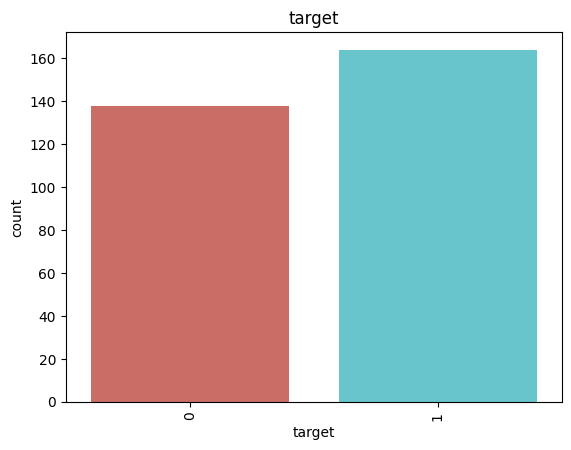

In [41]:
#plotting count plot of target values
sns.countplot(x = 'target',data = data,palette = 'hls')
plt.title('target')
plt.xticks(rotation = 90)
plt.show()

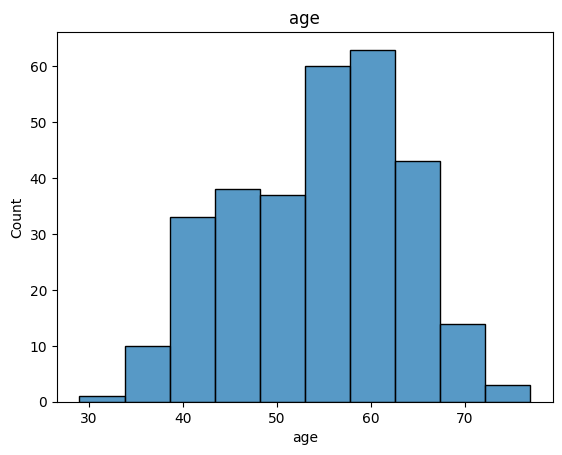

In [42]:
#visualising the age and count of each age
sns.histplot(data['age'],bins = 10)
plt.title('age')
plt.show()

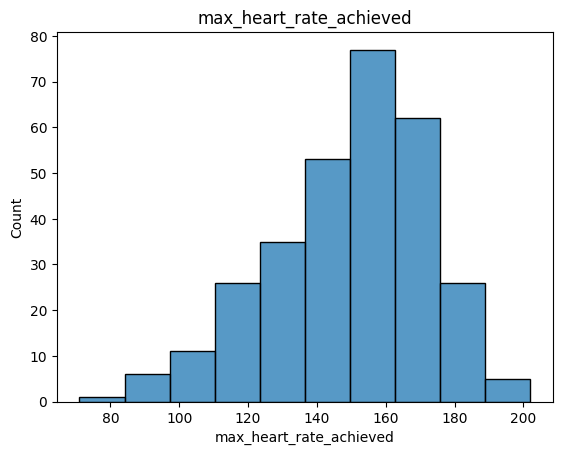

In [43]:
#visualising max_heart_rate_achieved and count
sns.histplot(data['max_heart_rate_achieved'],bins = 10)
plt.title('max_heart_rate_achieved')
plt.show()

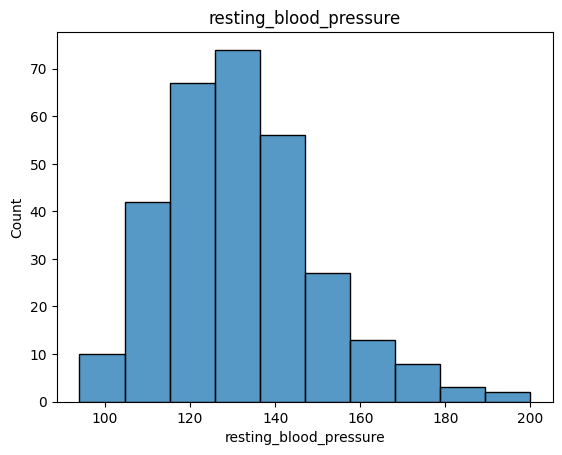

In [44]:
#visualising resting_blood_pressure and count
sns.histplot(data['resting_blood_pressure'],bins = 10)
plt.title('resting_blood_pressure')
plt.show()

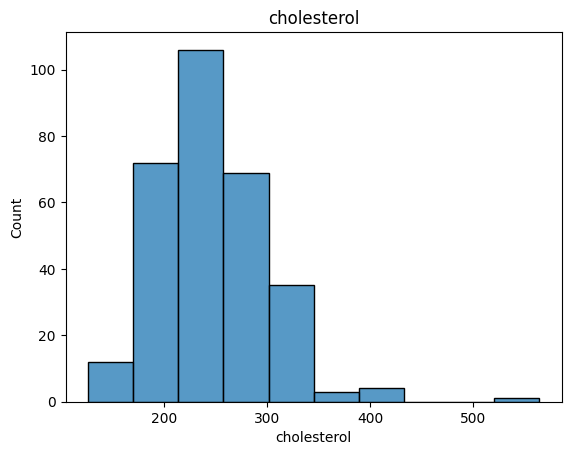

In [45]:
#visualising cholesterol and count
sns.histplot(data['cholesterol'],bins = 10)
plt.title('cholesterol')
plt.show()

In [46]:
#splitting features and the result
y = data['target']
data = data.drop('target', axis = 1)
data = pd.get_dummies(data, drop_first=True)
x = data
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [47]:
# splitting the data into testing and training datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (241, 19)
Shape of x_test : (61, 19)
Shape of y_train : (241,)
Shape of y_test : (61,)


In [48]:
# logistic regression model training
from sklearn.linear_model import LogisticRegression#create a new logistic regression model
log_reg = LogisticRegression(max_iter = 10000)#fit the model to the training data
log_reg.fit(x_train, y_train)
print('log_reg accuracy: {}'.format(log_reg.score(x_train, y_train)))
print('log_reg accuracy: {}'.format(log_reg.score(x_test, y_test)))

log_reg accuracy: 0.8589211618257261
log_reg accuracy: 0.8360655737704918


In [49]:
# standardising the values
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

In [50]:
# Without standardising the model is overfitted
#so using the standardised data for fitting the svm model
# svm model training
from sklearn.svm import SVC
model = SVC(C =1,kernel ="rbf",gamma = 0.01)
model.fit(x_train_std, y_train)
print('model accuracy: {}'.format(model.score(x_train_std, y_train)))
print('model accuracy: {}'.format(model.score(x_test_std, y_test)))

model accuracy: 0.8464730290456431
model accuracy: 0.7868852459016393


In [51]:
# training ensemble model
from sklearn.ensemble import VotingClassifier#create a dictionary of our models
estimators=[('log_reg',log_reg),('model',model)]#create our votingclassifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(x_train, y_train)#test our model on the test data
print('model accuracy: {}'.format(ensemble.score(x_train, y_train)))
print('model accuracy: {}'.format(ensemble.score(x_test, y_test)))

model accuracy: 0.9377593360995851
model accuracy: 0.7540983606557377


In [52]:
#predicting the y values for x_test
y_pred = ensemble.predict(x_test)

In [53]:
#visualising the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        25
           1       0.89      0.67      0.76        36

    accuracy                           0.75        61
   macro avg       0.77      0.77      0.75        61
weighted avg       0.79      0.75      0.76        61



In [54]:
# testing the model upon the new data
# predicting the output whether a person has heart disease or not
input_data = (63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = ensemble.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
 print('no heart disease')
else:
 print('heart disease')

[1]
heart disease


In [56]:
input_data = (48,120,220,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = ensemble.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
 print('no heart disease')
else:
 print('heart disease')

[1]
heart disease
